Basics of Blockchain

    Blockchain Structure: A blockchain is a chain of blocks. Each block contains:
        A list of transactions.
        A timestamp.
        A hash of the previous block.
        Its own hash.

    Hashing: Hashing is a process that takes an input (or 'message') and returns a fixed-length string of bytes. A small change in input drastically changes the output hash.

    Proof of Work (PoW): A consensus mechanism to ensure the security of the blockchain. Miners compete to solve a mathematical problem, and the first to solve it gets to add the next block to the blockchain.

    Decentralization: Instead of having a central authority, blockchain relies on a distributed network of nodes that all maintain a copy of the blockchain.

In [1]:
! pip install hashlib

ERROR: Ignored the following yanked versions: 20081119
ERROR: Could not find a version that satisfies the requirement hashlib (from versions: none)
ERROR: No matching distribution found for hashlib


In [2]:
import hashlib

In [3]:
# Block class

import hashlib
import time

class Block:
    def __init__(self, index, previous_hash, timestamp, data, nonce=0):
        self.index = index
        self.previous_hash = previous_hash
        self.timestamp = timestamp
        self.data = data
        self.nonce = nonce
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        value = (str(self.index) + str(self.previous_hash) + 
                 str(self.timestamp) + str(self.data) + str(self.nonce))
        return hashlib.sha256(value.encode('utf-8')).hexdigest()

    def __str__(self):
        return (f"Block(Index: {self.index}, "
                f"Previous Hash: {self.previous_hash}, "
                f"Timestamp: {self.timestamp}, "
                f"Data: {self.data}, "
                f"Nonce: {self.nonce}, "
                f"Hash: {self.hash})")


In [4]:
# Blockchain class

class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self):
        return Block(0, "0", time.time(), "Genesis Block")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, new_block):
        new_block.previous_hash = self.get_latest_block().hash
        new_block.hash = new_block.calculate_hash()
        self.chain.append(new_block)

    def __str__(self):
        chain_str = ""
        for block in self.chain:
            chain_str += str(block) + "\n"
        return chain_str


In [5]:
# proof of work

class Block:
    def __init__(self, index, previous_hash, timestamp, data, nonce=0):
        self.index = index
        self.previous_hash = previous_hash
        self.timestamp = timestamp
        self.data = data
        self.nonce = nonce
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        value = (str(self.index) + str(self.previous_hash) + 
                 str(self.timestamp) + str(self.data) + str(self.nonce))
        return hashlib.sha256(value.encode('utf-8')).hexdigest()

    def mine_block(self, difficulty):
        target = '0' * difficulty
        while self.hash[:difficulty] != target:
            self.nonce += 1
            self.hash = self.calculate_hash()
        print(f"Block mined: {self.hash}")

class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]
        self.difficulty = 4  # Difficulty level for PoW

    def create_genesis_block(self):
        return Block(0, "0", time.time(), "Genesis Block")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, new_block):
        new_block.previous_hash = self.get_latest_block().hash
        new_block.mine_block(self.difficulty)
        self.chain.append(new_block)

    def __str__(self):
        chain_str = ""
        for block in self.chain:
            chain_str += str(block) + "\n"
        return chain_str


In [8]:
# Testing blockchain

# Create the blockchain
my_blockchain = Blockchain()

# Add blocks
my_blockchain.add_block(Block(1, my_blockchain.get_latest_block().hash, time.time(), "Block 1 Data"))
my_blockchain.add_block(Block(2, my_blockchain.get_latest_block().hash, time.time(), "Block 2 Data"))
my_blockchain.add_block(Block(3, my_blockchain.get_latest_block().hash, time.time(), "Block 3 Data"))
my_blockchain.add_block(Block(4, my_blockchain.get_latest_block().hash, time.time(), "Block 4 Data"))


# Print the blockchain
print(my_blockchain)


Block mined: 000069c04b25964a7548c8ddeb54f09a6593acbcc77b99d614403d397af853d3
Block mined: 000075baff622182ac723b9b9ea01a13ba8b8d6bd2b47ddf1a85a4dd8d71f99f
Block mined: 00008b47379e0a240005902878d335f049d9eb77752a324c52994b525fa2af02
Block mined: 00002e8ce9b2199615b55ae20c0dd969584a9ce898efb0559691826f08ab6934



Block mined: 00000ecb1a4636475a3d1f05a1d220b8b693635e8ca1a08b3a1f39205036355b
Block mined: 0000c00306ef6fa6e1045084e24abda63aa336994ea5cd25dcc098c4b8301451
Block mined: 00000a5e9e49c5faf877353f4cade2cf673cab1b96112654fa3300b50af3dbfc
Block mined: 000016ae04ce944d1009698f23492e8a1c96b8e2230392bbbe3e8f664befa4ca
Block mined: 0000291fb7306224785fd79bebaadc637cd1e98ee44a8e250b08a182629f8879
Block(Index: 0, Previous Hash: 0, Timestamp: 1719285988.4046044, Data: Genesis Block, Nonce: 0, Hash: 3a6013b1b1cb82f25ed21bfa51c2d5765cc911dcb94e5796b2ec76eac998ddb3)
Block(Index: 1, Previous Hash: 3a6013b1b1cb82f25ed21bfa51c2d5765cc911dcb94e5796b2ec76eac998ddb3, Timestamp: 1719285988.404664, Data: Block 1 Data, Nonce: 53538, Hash: 00000ecb1a4636475a3d1f05a1d220b8b693635e8ca1a08b3a1f39205036355b)
Block(Index: 2, Previous Hash: 00000ecb1a4636475a3d1f05a1d220b8b693635e8ca1a08b3a1f39205036355b, Timestamp: 1719285988.4816005, Data: Block 2 Data, Nonce: 4252, Hash: 0000c00306ef6fa6e1045084e24abda63aa336994e

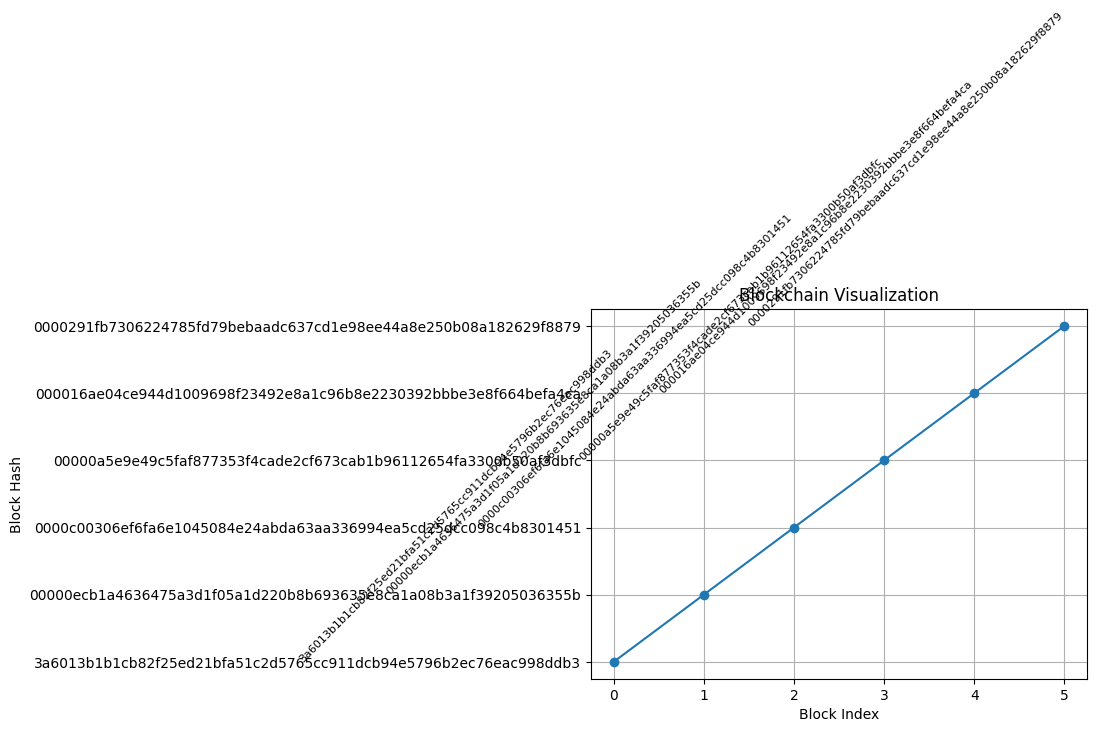

In [10]:
# Add blocks and add visualize

import hashlib
import time
import matplotlib.pyplot as plt

class Block:
    def __init__(self, index, previous_hash, timestamp, data, nonce=0):
        self.index = index
        self.previous_hash = previous_hash
        self.timestamp = timestamp
        self.data = data
        self.nonce = nonce
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        value = (str(self.index) + str(self.previous_hash) + 
                 str(self.timestamp) + str(self.data) + str(self.nonce))
        return hashlib.sha256(value.encode('utf-8')).hexdigest()

    def mine_block(self, difficulty):
        target = '0' * difficulty
        while self.hash[:difficulty] != target:
            self.nonce += 1
            self.hash = self.calculate_hash()
        print(f"Block mined: {self.hash}")

    def __str__(self):
        return (f"Block(Index: {self.index}, "
                f"Previous Hash: {self.previous_hash}, "
                f"Timestamp: {self.timestamp}, "
                f"Data: {self.data}, "
                f"Nonce: {self.nonce}, "
                f"Hash: {self.hash})")

class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]
        self.difficulty = 4

    def create_genesis_block(self):
        return Block(0, "0", time.time(), "Genesis Block")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, new_block):
        new_block.previous_hash = self.get_latest_block().hash
        new_block.mine_block(self.difficulty)
        self.chain.append(new_block)

    def __str__(self):
        chain_str = ""
        for block in self.chain:
            chain_str += str(block) + "\n"
        return chain_str

    def visualize_blockchain(self):
        block_indexes = [block.index for block in self.chain]
        block_hashes = [block.hash for block in self.chain]

        fig, ax = plt.subplots()
        ax.plot(block_indexes, block_hashes, marker='o')

        for i, txt in enumerate(block_hashes):
            ax.annotate(txt, (block_indexes[i], block_hashes[i]), fontsize=8, rotation=45, ha='right')

        plt.xlabel('Block Index')
        plt.ylabel('Block Hash')
        plt.title('Blockchain Visualization')
        plt.grid(True)
        plt.show()

# Create the blockchain
my_blockchain = Blockchain()

# Add blocks with sample data
for i in range(1, 6):
    my_blockchain.add_block(Block(i, my_blockchain.get_latest_block().hash, time.time(), f"Block {i} Data"))

# Print the blockchain
print(my_blockchain)

# Visualize the blockchain
my_blockchain.visualize_blockchain()
